## Linear Regression vs Lasso vs Ridge Model on just numeric data
using Poly to create interaction terms

| Model Features | --- | --- | --- |---|
| --- | --- |--- | --- |---|
| **Numeric** | --- |--- | --- |---|
| Lot Area | Overall Quality | Overall Condition | Year Remod/Add | Total SF |
| Total Bathrooms | Fireplaces | Garage Area | --- | --- |
| --- | --- |--- | --- |---|



In [1]:
#importing libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression,LassoCV,RidgeCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn import metrics
#import re

# Data Dictionary - [Link](http://jse.amstat.org/v19n3/decock/DataDocumentation.txt) 

In [2]:
#importing clean v5_data
housing_data = pd.read_csv("../datasets/complete_training_data.csv")
#importing testing data
testing_data = pd.read_csv("../datasets/complete_kaggle_test.csv")

In [3]:
housing_data.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

In [4]:
xvars = ["Lot Area","Overall Qual","Overall Cond","Year Remod/Add","Total SF","Total Bathrooms","Fireplaces","Garage Area"]

In [5]:
X = housing_data[xvars]
y = housing_data["SalePrice"]

In [6]:
poly = PolynomialFeatures(include_bias=False)

In [7]:
X_poly = poly.fit_transform(X)

In [8]:
df_X_poly = pd.DataFrame(X_poly, columns=poly.get_feature_names(xvars))

In [9]:
df_X_poly_complete = pd.concat([df_X_poly,y],axis=1)

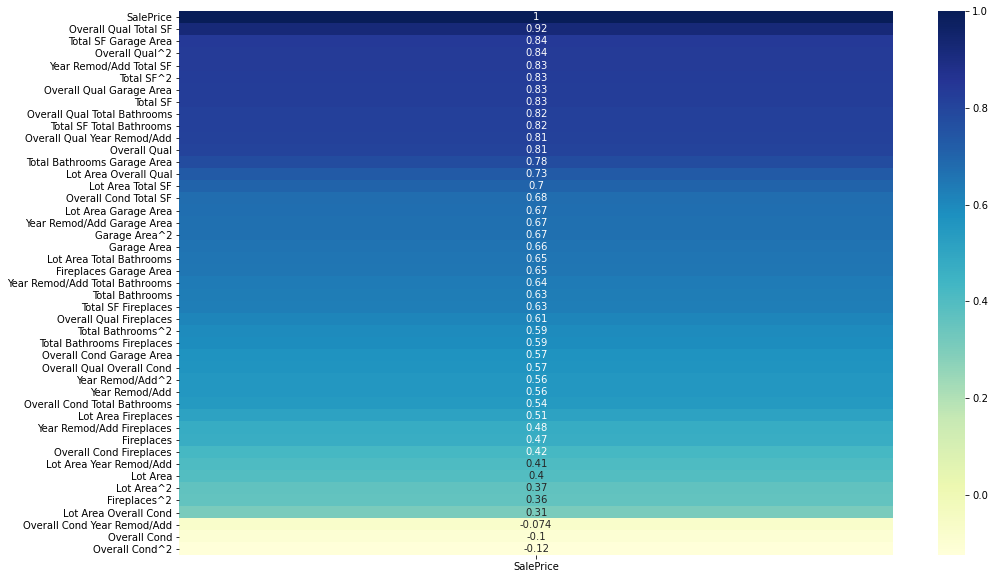

In [10]:
plt.figure(figsize=(16,10))
sns.heatmap(df_X_poly_complete.corr()[["SalePrice"]].sort_values(by="SalePrice",ascending=False),
           annot=True,
           cmap='YlGnBu',
           annot_kws={'fontsize':10});

In [11]:
#spliting the data 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(df_X_poly, y, test_size=0.2,random_state=2020)

In [12]:
X_train.shape

(1618, 44)

In [13]:
ss = StandardScaler()
Z_train = ss.fit_transform(X_train)
Z_test = ss.transform(X_test)

In [14]:
linreg = LinearRegression()
lasso = LassoCV(n_alphas=500)
ridge = RidgeCV(alphas=np.linspace(.1, 10, 100))

In [15]:
#looking at 5 part cross validation on traing data. The R2 is quite good at 0.88
linreg_scores = cross_val_score(linreg, Z_train, y_train, cv=5)
linreg_scores.mean()

0.904286684163457

In [16]:
lasso_scores = cross_val_score(lasso, Z_train, y_train, cv=5)
lasso_scores.mean()

C:\ProgramData\Anaconda3\envs\dsi\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 72276259348.08795, tolerance: 864136468.663319
  positive)
C:\ProgramData\Anaconda3\envs\dsi\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 43502657948.57178, tolerance: 834506461.3351705
  positive)
C:\ProgramData\Anaconda3\envs\dsi\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 26397085427.107666, tolerance: 825158803.9636818
  positive)
C:\ProgramData\Anaconda3\envs\dsi\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase

0.8990841590701286

In [17]:
ridge_scores = cross_val_score(ridge, Z_train, y_train, cv=5)
ridge_scores.mean()

0.9030278241240943

linreg does the best job fitting

In [18]:
linreg.fit(Z_train,y_train)

LinearRegression()

In [19]:
preds_train = linreg.predict(Z_train)
preds_test = linreg.predict(Z_test)

In [20]:
display(linreg.score(Z_train,y_train))
display(linreg.score(Z_test,y_test))

0.9151023233841538

0.8924092745792245

In [21]:
X_train_sm = Z_train
X_train_sm = sm.add_constant(X_train_sm)
y_train_sm = y_train

In [22]:
sm_model = sm.OLS(y_train_sm,X_train_sm).fit()

In [23]:
results_summary = sm_model.summary()

In [24]:
results_summary.tables[0]

Dep. Variable:,SalePrice,R-squared:,0.915
Model:,OLS,Adj. R-squared:,0.913
Method:,Least Squares,F-statistic:,385.3
Date:,"Sun, 16 Aug 2020",Prob (F-statistic):,0.00
Time:,18:09:57,Log-Likelihood:,-18562.
No. Observations:,1618,AIC:,3.721e+04
Df Residuals:,1573,BIC:,3.746e+04
Df Model:,44,,
Covariance Type:,nonrobust,,


In [25]:
results_as_html = results_summary.tables[1].as_html()
coef = pd.read_html(results_as_html, header=0, index_col=0)[0]

In [26]:
indexes = df_X_poly.columns

In [27]:
complete_indexes = ['const']
complete_indexes.extend(indexes)

In [28]:
coef["indexes"] = complete_indexes

In [29]:
coef.set_index("indexes",inplace=True);

In [30]:
coef.head(9)

,coef,std err,t,P>|t|,[0.025,0.975]
indexes,,,,,,
const,181700.0,585.886,310.132,0.000,181000.0,183000.0
Lot Area,-84150.0,88300.000,-0.953,0.341,-257000.0,89100.0
Overall Qual,-227500.0,130000.000,-1.756,0.079,-482000.0,26600.0
Overall Cond,279000.0,74700.000,3.734,0.000,132000.0,425000.0
Year Remod/Add,-341200.0,213000.000,-1.604,0.109,-759000.0,76200.0
Total SF,-445000.0,129000.000,-3.440,0.001,-699000.0,-191000.0
Total Bathrooms,-359900.0,107000.000,-3.367,0.001,-570000.0,-150000.0
Fireplaces,54330.0,83400.000,0.652,0.515,-109000.0,218000.0
Garage Area,48730.0,90600.000,0.538,0.591,-129000.0,226000.0


### Calculating sales prices in training data (need to output .csv w/ header Id,SalePrice)

In [31]:
X_kaggle = testing_data[xvars]

In [32]:
X_kaggle_poly = poly.fit_transform(X_kaggle)

In [33]:
X_kaggle_poly = pd.DataFrame(X_kaggle_poly, columns=poly.get_feature_names(xvars))

In [34]:
X_kaggle_poly.shape

(878, 44)

In [35]:
#need to regularize the kaggle data
Z_kaggle_poly = ss.transform(X_kaggle_poly)

In [36]:
#finding differences between train and testing data columns. They need to match for fit to make sense
for i,x in enumerate(X_train.columns):
    if X_kaggle_poly.columns[i] != x:
        print(i,x)
    else:
        pass

In [37]:
price_X_testing = linreg.predict(Z_kaggle_poly)
testing_data["SalePrice"] = price_X_testing
testing_data.head(1)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Total SF x Garage Area,Overall Qual^2,Year Remod/Add x Total SF,Total SF^2,Overall Qual x Garage Area,Overall Qual x Total Bathrooms,Total SF x Total Bathrooms,Overall Qual x Year Remod/Add,Total Bathrooms x Garage Area,SalePrice
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,1297120,36,5748600,8690704,2640,12.0,5896.0,11700,880.0,150763.046303


In [38]:
linreg_poly_fit = testing_data[["Id","SalePrice"]]
linreg_poly_fit.to_csv("../datasets/linreg_poly_fit.csv",index=False)